**Determinants of the Probability to Develop a Malignant Tumor**
---
By: Pedram Bazargani




**Locating and interpreting the summary statistics of this dataset**

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

data = load_breast_cancer()
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
df['target'] = data['target']

summary_statistics = df.describe()
print(summary_statistics)

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

**Finding which factors are highly correlated to the probability to develop a malignant tumor**

In [ ]:
#correlation matrix
correlation_with_target = df.corr()['target'].sort_values()

highly_correlated_factors = correlation_with_target[correlation_with_target.abs() > 0.7]

print("\nHighly correlated factors with the target (malignant = 0, benign = 1):\n")
print(highly_correlated_factors)


Highly correlated factors with the target (malignant = 0, benign = 1):

worst concave points   -0.793566
worst perimeter        -0.782914
mean concave points    -0.776614
worst radius           -0.776454
mean perimeter         -0.742636
worst area             -0.733825
mean radius            -0.730029
mean area              -0.708984
target                  1.000000
Name: target, dtype: float64


The factors that are highly correlated to the probability to develop a malignant tumor include worst concave points, worst perimeter, mean concave points, worst radius, and mean area. The sign of these factors is negative which means that they are highly correlated with a malignant tumor.

**Finding which factors have the highest impact on the probability to develop a malignant tumor**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

corr_matrix = df.corr().abs()

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

df_cancer = df.drop(to_drop, axis=1)

X = df_cancer.drop(columns=['target'])
y = df_cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]})
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()

coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

print(coefficients)

                    Feature  Coefficient  Absolute Coefficient
8              radius error    -2.704978              2.704978
19          worst concavity    -2.534662              2.534662
18        worst compactness    -1.732504              1.732504
9             texture error     1.118842              1.118842
21           worst symmetry    -1.078235              1.078235
4            mean concavity    -0.968434              0.968434
20     worst concave points    -0.911693              0.911693
0               mean radius    -0.890068              0.890068
3          mean compactness    -0.619653              0.619653
5       mean concave points    -0.526647              0.526647
17         worst smoothness    -0.481853              0.481853
16            worst texture    -0.422207              0.422207
6             mean symmetry    -0.388971              0.388971
2           mean smoothness    -0.289850              0.289850
22  worst fractal dimension    -0.254812              0

The factors that have the highest impact on the probability to develop a malignant tumor include radius error, worst concavity, worst compactness, texture error, and worst symmetry. All of them except texture error have a negative impact and all of them except texture error increase the likelihood of a malignant tumor.



**Assessing K-means clustering performance in grouping the data into benign and malignant classes**

Confusion Matrix:
[[ 37 175]
 [344  13]]


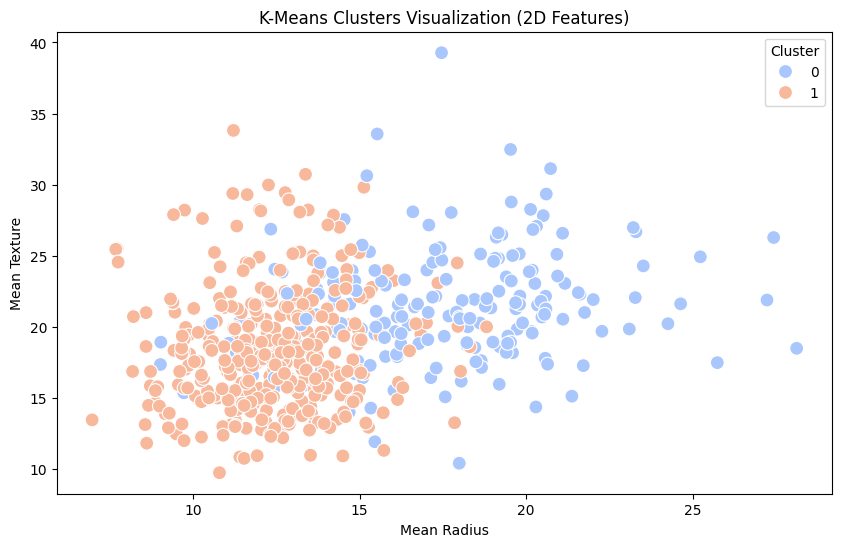

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

df['Adjusted Cluster'] = np.where(df['Cluster'] == 0, 1, 0)

conf_matrix = confusion_matrix(df['target'], df['Adjusted Cluster'])
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['mean radius'], y=df['mean texture'], hue=df['Cluster'], palette='coolwarm', s=100)
plt.title('K-Means Clusters Visualization (2D Features)')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.show()

 The K-Means clustering perfomed fairly poorly in grouping the data into benign and malignant classes. While you can see some grouping into classes, ultimately there is not great grouping.

 The confusion matrix of a true positive of 37, true negative of 13, false positive 175, and false negative of 344 goes to show that this k-means clustering did not work well.

**Concluding Statements**

Based on my results cluster 0 is more likely to represent malignant tumors because it captures the majority of true malignant cases, despite some misclassifications. I found that cluster 1 is more likely to represent benign tumors because it mostly contains benign cases even though it also has a large number of false positives.

These findings highlight the need for trained machine learning and more advanced methods for this task.